<a href="https://colab.research.google.com/github/IImbryk/control_system_course/blob/main/LunarLander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка пакетов

In [ ]:
# tba
#

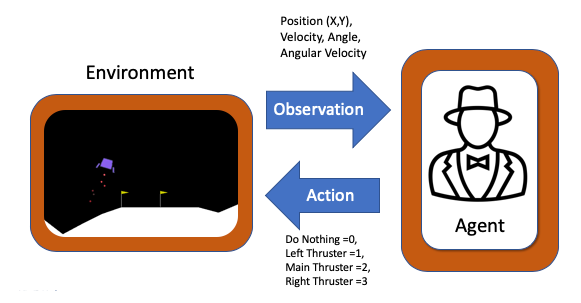

0 - ничего не делаем

1 - левый реактивный двигатель

2 - главный реактивный двигатель

3 - правый реактивный двигатель


## Импорт библиотек

In [2]:
import typing

import gym
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import random

### ! Нижняя ячейка - не для Windows

In [3]:
# pyvirtualdisplay is for linux/macOS
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=True,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()


FileNotFoundError: [WinError 2] Не удается найти указанный файл

In [4]:
State = np.ndarray # обратная связь представлена как массив 
Action = int # управлябщее воздействие как целые числа

# регулятор 
Regulator = typing.Callable[[State], Action]


def random_regulator(state: State, number_actions: int) -> Action:
  """
  Алгоритм регулирования реализовать здесь
  """
  return random.randint(1, 3)


def make_random_regulator(number_actions: int) -> Regulator:
    return lambda state: random_regulator(state, number_actions)


def simulate(regulator: Regulator, env: gym.Env, ax: plt.Axes) -> None:
    state = env.reset()
    img = ax.imshow(env.render())  ## was env.render(mode='rgb_array')
    done = False

    while not done:
        action = regulator(state)
        img.set_data(env.render())   ## was env.render(mode='rgb_array')
        ax.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, info, _ = env.step(action)     ## added'info'  
    env.close()
    
# Вызов модели из среды Gym
lunar_lander_v2 = gym.make('LunarLander-v2', render_mode="rgb_array")  ## added render_mode
_ = lunar_lander_v2.env.reset(seed=42)   ## was lunar_lander_v2.seed(42)

# Обявление регулятора
random_agent = make_random_regulator(lunar_lander_v2.action_space.n)


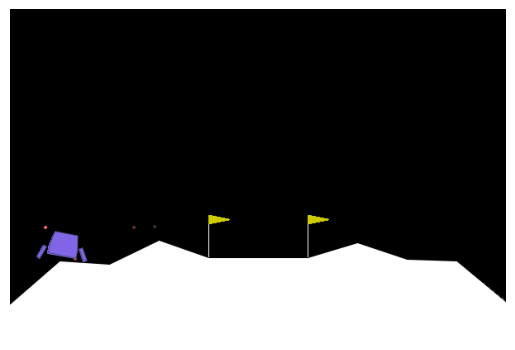

In [5]:
# Симуляция системы
_, ax = plt.subplots(1, 1)
simulate(random_agent, lunar_lander_v2, ax)